Librerias.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

DataFrames.

In [38]:
hechos=pd.read_csv('Hechos.csv')
poblacion=pd.read_csv('Poblacion.csv')
victimas=pd.read_csv('Victimas.csv')

Como el segundo KPI involucra solo a los motociclistas como víctimas, se realiza un filtro a la tabla hechos, para después unirla y tener los datos reelevantes.

In [39]:
filtro=hechos[hechos["VICTIMA"] == 'MOTO']
filtro.head(3)

,Unnamed: 0,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,SEMESTRE
0,0,2016-0001,1,2016,1,4.0,AVENIDA,8,MOTO,AUTO,2016-1
2,2,2016-0003,1,2016,1,7.0,AVENIDA,1,MOTO,AUTO,2016-1
3,3,2016-0004,1,2016,1,0.0,AVENIDA,8,MOTO,SD,2016-1


Debido a que en el DataFrame 'hechos' no necesariamente son todos mortales, se lo une con el DataFrame 'victimas' para obtener solo los casos en donde haya fallecido 1 o mas personas.

In [40]:
df=pd.merge(filtro, victimas, left_on='ID', right_on='ID_hecho', how='inner')
df = pd.merge(df, poblacion, on='AAAA', how='inner')
df.head()

,Unnamed: 0_x,ID,N_VICTIMAS,AAAA,MM,HH,TIPO_DE_CALLE,COMUNA,VICTIMA,ACUSADO,SEMESTRE,Unnamed: 0_y,ID_hecho,SEXO,EDAD,Unnamed: 0,POBLACION_ANUAL
0,0,2016-0001,1,2016,1,4.0,AVENIDA,8,MOTO,AUTO,2016-1,0,2016-0001,MASCULINO,19,1,3059122.0
1,2,2016-0003,1,2016,1,7.0,AVENIDA,1,MOTO,AUTO,2016-1,2,2016-0003,MASCULINO,30,1,3059122.0
2,4,2016-0005,1,2016,1,5.0,AVENIDA,1,MOTO,PASAJEROS,2016-1,4,2016-0005,MASCULINO,29,1,3059122.0
3,5,2016-0008,1,2016,1,18.0,AVENIDA,8,MOTO,OBJETO FIJO,2016-1,5,2016-0008,MASCULINO,30,1,3059122.0
4,6,2016-0009,1,2016,1,19.0,CALLE,11,MOTO,AUTO,2016-1,6,2016-0009,MASCULINO,29,1,3059122.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     272 non-null    int64  
 1   ID               272 non-null    object 
 2   N_VICTIMAS       272 non-null    int64  
 3   AAAA             272 non-null    int64  
 4   MM               272 non-null    int64  
 5   HH               271 non-null    float64
 6   TIPO_DE_CALLE    272 non-null    object 
 7   COMUNA           272 non-null    int64  
 8   VICTIMA          272 non-null    object 
 9   ACUSADO          272 non-null    object 
 10  SEMESTRE         272 non-null    object 
 11  Unnamed: 0_y     272 non-null    int64  
 12  ID_hecho         272 non-null    object 
 13  SEXO             272 non-null    object 
 14  EDAD             272 non-null    object 
 15  Unnamed: 0       272 non-null    int64  
 16  POBLACION_ANUAL  272 non-null    float64
dtypes: float64(2), i

Ya que se conoce la fórmula de nuestra métrica para medir el KPI 2, se eliminan las columnas irrelevantes.

In [42]:
col_eliminar=['Unnamed: 0_x','ID','HH','TIPO_DE_CALLE','COMUNA','VICTIMA','ACUSADO','Unnamed: 0_y','SEXO','EDAD','Unnamed: 0','ID_hecho','MM','SEMESTRE','POBLACION_ANUAL']
df.drop(columns=col_eliminar, axis=1,inplace=True)
df.head(3)

,N_VICTIMAS,AAAA
0,1,2016
1,1,2016
2,1,2016


Se crea un nuevo DataFrame agrupado por años, ya que el KPI 2 es anual. Este contiene los datos de cantidad de victimas del año actual.

In [43]:
df_actual = filtro.groupby("AAAA")["N_VICTIMAS"].count().reset_index()
df_actual

,AAAA,N_VICTIMAS
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,27
5,2021,46


Se crea una nueva columna'AAAA_ANTERIOR' ya que la vamos a necesitar, como llave, para posteriormente unirla con otro df.

In [44]:
df_actual['AAAA_ANTERIOR'] = df_actual['AAAA']-1
df_actual

,AAAA,N_VICTIMAS,AAAA_ANTERIOR
0,2016,64,2015
1,2017,53,2016
2,2018,55,2017
3,2019,50,2018
4,2020,27,2019
5,2021,46,2020


Se define otro DataFrame con los datos de cantidad de víctimas, pero del año anterior al que estamos viendo. Es por esto que la agrupación es, de igual manera que antes, por año.

In [45]:
df_anterior = filtro.groupby("AAAA")["N_VICTIMAS"].count().reset_index()
df_anterior = df_anterior.rename(columns={"N_VICTIMAS": "N_VICTIMAS_ANTERIOR",
                                          "AAAA": "AAAA_ANTERIOR"})
df_anterior

,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,27
5,2021,46


Por último, se unen los dos df creados anteriormente para ya tener todos los datos necesarios para nuestro KPI 2. Se unen mediante la columna 'AAAA_ANTERIOR' que se, también, creó anteriormente.

In [46]:
df_KPI_2 = pd.merge(df_actual, df_anterior, on="AAAA_ANTERIOR", how="inner")
df_KPI_2

,AAAA,N_VICTIMAS,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR
0,2017,53,2016,64
1,2018,55,2017,53
2,2019,50,2018,55
3,2020,27,2019,50
4,2021,46,2020,27


Se calcula el valor del KPI 2 para cada año mediante la fórmula ((anterior - actual) / anterior) * 100).

In [47]:
anterior = df_KPI_2["N_VICTIMAS_ANTERIOR"]
actual = df_KPI_2["N_VICTIMAS"]
df_KPI_2["KPI_2"] = (((anterior - actual) / anterior) * 100).round(2)
df_KPI_2

,AAAA,N_VICTIMAS,AAAA_ANTERIOR,N_VICTIMAS_ANTERIOR,KPI_2
0,2017,53,2016,64,17.19
1,2018,55,2017,53,-3.77
2,2019,50,2018,55,9.09
3,2020,27,2019,50,46.00
4,2021,46,2020,27,-70.37


Analizando la tabla se encuentra que un KPI positivo significa la reduccion de accidentes de motociclistas anual. Por el contrario un KPI negativo significa el aumento de accidentes motobilisticos anual. Cuanto mas grande el módulo, mas grande la variación entre un año y el otro.

Se grafica el valor del KPI 2 en función del año, para visualizar mas facilmente el comportamiento.

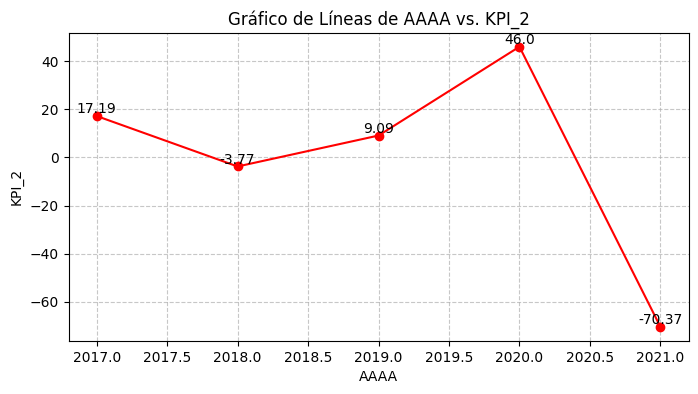

In [48]:
semestre = df_KPI_2["AAAA"]
KPI = df_KPI_2["KPI_2"]
# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(semestre, KPI, marker='o', linestyle='-', color="red")
plt.title('Gráfico de Líneas de AAAA vs. KPI_2')
plt.xlabel('AAAA')
plt.ylabel('KPI_2')
# Agregar etiquetas de datos (valores) sobre cada punto
for i, valor in enumerate(KPI):
    plt.text(semestre[i], valor, str(valor), ha='center', va='bottom')
# Mostrar el gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

El gráfico muestras pendientes negativas cuando se aumenta la cantidad de acidentes de motociclistas anuales. Las pendientes positivas indican una reduccion de la cantidad de accidentes anuales. La caída mas abrupta se ve en el 2021 que aumentó considerablemnte la cantidad de accidentes. Puede deberse a que en 2020 mejoró porque estabamos en cuarentena, pero después, cuando hubo libertad, hubo menos cuidados.

Se guarda el df del KPI 2 en formato CSV.

In [49]:
df_KPI_2.to_csv('KPI_2.csv')